# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

La ubicacion, la superficie construida, los precios, numero de habitaciones y baños son datos clave para trabajar el problema inmobiliario.

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

##Explicación

 A Continuación se carga eldataset propuesto y se muestra información básica del mismo como shape(cantidad de instancias y columnas, información general respecto de la cantidad de valores no nulos por columna, tipo de dato que contiene el dataset y,por último se muestran las primeras cinco filas de la base de datos

In [168]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')


In [169]:
data.shape

(146660, 19)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [171]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.61,-58.38,Argentina,Capital Federal,San Cristobal,7.00,7.00,2.00,140.00,140.00,"153,000.00",USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.62,-58.41,Argentina,Capital Federal,Boedo,2.00,1.00,2.00,70.00,58.00,"159,000.00",USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.59,-58.43,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,45.00,45.00,"125,000.00",USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.58,-58.44,Argentina,Capital Federal,Palermo,2.00,1.00,1.00,85.00,50.00,"295,000.00",USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.91,-57.94,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.00,1.00,1.00,50.00,35.00,"40,000.00",USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [172]:
data.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

Determinamos la cantidad de valores nulos por columna

In [173]:
data_nulls = data.isna()
data_nulls.sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Los valores nulos de la columna "bathtooms" los completo con el valor mas repetido dentro de esa columna, osea con la moda

In [174]:
bath_mode = data['bathrooms'].mode()[0]
data['bathrooms'].fillna(bath_mode, inplace=True)

Corroboro que se hayan completado los datos nulos de la columna

In [175]:
data['bathrooms'].isna().sum()

0

Defino la variable "datos erroneos", donde almaceno aquellas instancias donde el valor contenido en la columna "surface_total" es menor al valor contenido en la columna "surface_covered" y, posteriormente, a las instancias contenidas en la variable definida les asigno el valor de la columna "surface_total" para que no existan instancias en las que la superficie cubierta sea mayor a la superficie total

In [176]:
data_err = data['surface_total'] <= data['surface_covered']

In [177]:
data[data_err].loc[:, 'surface_total'] = data[data_err].loc[:, 'surface_covered']

/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Creo el data frame "promedios_barrio" donde almaceno los datos promedios de cada columna según el barrio en donde está ubicada la propiedad,luego uso el valor promedio de cada barrio para completar los datos faltantes en las columnas lat y lon

In [178]:
barr_avg = data.groupby(['l3']).mean()
barr_avg

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
l3,,,,,,,,
Abasto,-34.60,-58.41,2.92,1.99,1.40,76.19,67.64,"171,669.23"
Agronomía,-34.59,-58.49,2.84,1.85,1.43,104.83,89.70,"195,261.39"
Almagro,-34.61,-58.42,2.95,1.98,1.42,90.07,79.61,"180,403.76"
Almirante Brown,-34.81,-58.39,3.33,1.19,1.61,541.63,166.30,"243,656.01"
Avellaneda,-34.68,-58.35,3.08,2.03,1.37,193.82,165.71,"127,272.40"
...,...,...,...,...,...,...,...,...
Villa Riachuelo,-34.69,-58.47,3.55,2.43,1.52,135.82,103.11,"535,988.07"
Villa Santa Rita,-34.62,-58.48,2.89,1.90,1.29,100.78,75.18,"162,580.68"
Villa Soldati,-34.66,-58.44,3.90,2.70,1.36,171.88,291.95,"122,472.46"


In [179]:
data['Barrio'] = data['l3']

In [180]:
barr_avg.to_dict()

{'lat': {'Abasto': -34.60418364477521,
  'Agronomía': -34.59383278247624,
  'Almagro': -34.605690317822486,
  'Almirante Brown': -34.81390853154358,
  'Avellaneda': -34.6830319555206,
  'Balvanera': -34.60999959293299,
  'Barracas': -34.638580198140374,
  'Barrio Norte': -34.59301071310001,
  'Belgrano': -34.56304086677169,
  'Berazategui': -34.79272345338897,
  'Boca': -34.63346776446504,
  'Boedo': -34.627854887824945,
  'Caballito': -34.61721237923539,
  'Catalinas': -34.59805989816,
  'Cañuelas': -35.03218835459237,
  'Centro / Microcentro': -34.603797504280564,
  'Chacarita': -34.588610862390205,
  'Coghlan': -34.56172522749893,
  'Colegiales': -34.576678088782884,
  'Congreso': -34.60903304877598,
  'Constitución': -34.625409629737206,
  'Escobar': -34.36795418047913,
  'Esteban Echeverría': -34.84258890131574,
  'Ezeiza': -34.88796877217964,
  'Florencio Varela': -34.812968465954775,
  'Flores': -34.62878516520363,
  'Floresta': -34.63131003205576,
  'General Rodríguez': -34.612

In [181]:
dic_prom_lat = {'Abasto': -34.60418364477521,
                'Agronomía': -34.59383278247624,
                'Almagro': -34.605690317822486,
                'Almirante Brown': -34.81390853154358,
                'Avellaneda': -34.6830319555206,
                'Balvanera': -34.60999959293299,
                'Barracas': -34.638580198140374,
                'Barrio Norte': -34.59301071310001,
                'Belgrano': -34.56304086677169,
                'Berazategui': -34.79272345338897,
                'Boca': -34.63346776446504,
                'Boedo': -34.627854887824945,
                'Caballito': -34.61721237923539,
                'Catalinas': -34.59805989816,
                'Cañuelas': -35.03218835459237,
                'Centro / Microcentro': -34.603797504280564,
                'Chacarita': -34.588610862390205,
                'Coghlan': -34.56172522749893,
                'Colegiales': -34.576678088782884,
                'Congreso': -34.60903304877598,
                'Constitución': -34.625409629737206,
                'Escobar': -34.36795418047913,
                'Esteban Echeverría': -34.84258890131574,
                'Ezeiza': -34.88796877217964,
                'Florencio Varela': -34.812968465954775,
                'Flores': -34.62878516520363,
                'Floresta': -34.63131003205576,
                'General Rodríguez': -34.61298324748869,
                'General San Martín': -34.56229453473845,
                'Hurlingham': -34.60134340406907,
                'Ituzaingó': -34.64093239437121,
                'José C Paz': -34.514433238382715,
                'La Matanza': -34.66915788571711,
                'La Plata': -34.88775009599461,
                'Lanús': -34.70708603973915,
                'Las Cañitas': -34.56856046711912,
                'Liniers': -34.644168165075804,
                'Lomas de Zamora': -34.761312616774525,
                'Malvinas Argentinas': -34.49305348758867,
                'Marcos Paz': -34.79080708129374,
                'Mataderos': -34.6544875653751,
                'Merlo': -34.67541759562511,
                'Monserrat': -34.61428331010764,
                'Monte Castro': -34.62046274178549,
                'Moreno': -34.62804113210382,
                'Morón': -34.64611486585693,
                'Nuñez': -34.54810968495093,
                'Once': -34.60774358150452,
                'Palermo': -34.585301806132186,
                'Parque Avellaneda': -34.64618673581373,
                'Parque Centenario': -34.60481439776684,
                'Parque Chacabuco': -34.63595164716309,
                'Parque Chas': -34.58501349283646,
                'Parque Patricios': -34.63537248482373,
                'Paternal': -34.602018061718596,
                'Pilar': -34.441436623148526,
                'Pompeya': -34.648739252433344,
                'Presidente Perón': -34.924795514282,
                'Puerto Madero': -34.61258455526826,
                'Quilmes': -34.65724293354056,
                'Recoleta': -34.592087678936785,
                'Retiro': -34.595366181802355,
                'Saavedra': -34.551857490151704,
                'San Cristobal': -34.622342812653834,
                'San Fernando': -34.44866283179569,
                'San Isidro': -34.48135178273034,
                'San Miguel': -34.54841185834981,
                'San Nicolás': -34.60379076107356,
                'San Telmo': -34.6208193052599,
                'San Vicente': -34.99718584286296,
                'Tigre': -34.41578088638468,
                'Tres de Febrero': -34.606454914228735,
                'Tribunales': -34.602765648497154,
                'Velez Sarsfield': -34.63189434145001,
                'Versalles': -34.629694945608236,
                'Vicente López': -34.520178060800625,
                'Villa Crespo': -34.598822947262114,
                'Villa Devoto': -34.604160871166684,
                'Villa General Mitre': -34.61057312547995,
                'Villa Lugano': -34.67666534205588,
                'Villa Luro': -34.638448099581865,
                'Villa Ortuzar': -34.58145354132926,
                'Villa Pueyrredón': -34.584577778201584,
                'Villa Real': -34.62012968423618,
                'Villa Riachuelo': -34.690386625897624,
                'Villa Santa Rita': -34.615293944576194,
                'Villa Soldati': -34.66200087130869,
                'Villa Urquiza': -34.57385913271374,
                'Villa del Parque': -34.60650692974747}

In [182]:
data['Barrio'].replace({'Abasto': -34.60418364477521,
                        'Agronomía': -34.59383278247624,
                        'Almagro': -34.605690317822486,
                        'Almirante Brown': -34.81390853154358,
                        'Avellaneda': -34.6830319555206,
                        'Balvanera': -34.60999959293299,
                        'Barracas': -34.638580198140374,
                        'Barrio Norte': -34.59301071310001,
                        'Belgrano': -34.56304086677169,
                        'Berazategui': -34.79272345338897,
                        'Boca': -34.63346776446504,
                        'Boedo': -34.627854887824945,
                        'Caballito': -34.61721237923539,
                        'Catalinas': -34.59805989816,
                        'Cañuelas': -35.03218835459237,
                        'Centro / Microcentro': -34.603797504280564,
                        'Chacarita': -34.588610862390205,
                        'Coghlan': -34.56172522749893,
                        'Colegiales': -34.576678088782884,
                        'Congreso': -34.60903304877598,
                        'Constitución': -34.625409629737206,
                        'Escobar': -34.36795418047913,
                        'Esteban Echeverría': -34.84258890131574,
                        'Ezeiza': -34.88796877217964,
                        'Florencio Varela': -34.812968465954775,
                        'Flores': -34.62878516520363,
                        'Floresta': -34.63131003205576,
                        'General Rodríguez': -34.61298324748869,
                        'General San Martín': -34.56229453473845,
                        'Hurlingham': -34.60134340406907,
                        'Ituzaingó': -34.64093239437121,
                        'José C Paz': -34.514433238382715,
                        'La Matanza': -34.66915788571711,
                        'La Plata': -34.88775009599461,
                        'Lanús': -34.70708603973915,
                        'Las Cañitas': -34.56856046711912,
                        'Liniers': -34.644168165075804,
                        'Lomas de Zamora': -34.761312616774525,
                        'Malvinas Argentinas': -34.49305348758867,
                        'Marcos Paz': -34.79080708129374,
                        'Mataderos': -34.6544875653751,
                        'Merlo': -34.67541759562511,
                        'Monserrat': -34.61428331010764,
                        'Monte Castro': -34.62046274178549,
                        'Moreno': -34.62804113210382,
                        'Morón': -34.64611486585693,
                        'Nuñez': -34.54810968495093,
                        'Once': -34.60774358150452,
                        'Palermo': -34.585301806132186,
                        'Parque Avellaneda': -34.64618673581373,
                        'Parque Centenario': -34.60481439776684,
                        'Parque Chacabuco': -34.63595164716309,
                        'Parque Chas': -34.58501349283646,
                        'Parque Patricios': -34.63537248482373,
                        'Paternal': -34.602018061718596,
                        'Pilar': -34.441436623148526,
                        'Pompeya': -34.648739252433344,
                        'Presidente Perón': -34.924795514282,
                        'Puerto Madero': -34.61258455526826,
                        'Quilmes': -34.65724293354056,
                        'Recoleta': -34.592087678936785,
                        'Retiro': -34.595366181802355,
                        'Saavedra': -34.551857490151704,
                        'San Cristobal': -34.622342812653834,
                        'San Fernando': -34.44866283179569,
                        'San Isidro': -34.48135178273034,
                        'San Miguel': -34.54841185834981,
                        'San Nicolás': -34.60379076107356,
                        'San Telmo': -34.6208193052599,
                        'San Vicente': -34.99718584286296,
                        'Tigre': -34.41578088638468,
                        'Tres de Febrero': -34.606454914228735,
                        'Tribunales': -34.602765648497154,
                        'Velez Sarsfield': -34.63189434145001,
                        'Versalles': -34.629694945608236,
                        'Vicente López': -34.520178060800625,
                        'Villa Crespo': -34.598822947262114,
                        'Villa Devoto': -34.604160871166684,
                        'Villa General Mitre': -34.61057312547995,
                        'Villa Lugano': -34.67666534205588,
                        'Villa Luro': -34.638448099581865,
                        'Villa Ortuzar': -34.58145354132926,
                        'Villa Pueyrredón': -34.584577778201584,
                        'Villa Real': -34.62012968423618,
                        'Villa Riachuelo': -34.690386625897624,
                        'Villa Santa Rita': -34.615293944576194,
                        'Villa Soldati': -34.66200087130869,
                        'Villa Urquiza': -34.57385913271374,
                        'Villa del Parque': -34.60650692974747}, inplace=True)

In [183]:
data["Barrio"]

0        -34.62
1        -34.63
2        -34.59
3        -34.59
4        -34.89
          ...  
146655   -34.79
146656   -34.44
146657   -34.44
146658   -34.44
146659   -34.44
Name: Barrio, Length: 146660, dtype: float64

In [184]:
data['lat2'] = data.apply(lambda row: row['Barrio'] if np.isnan(row['lat']) else row['lat'], axis=1)


In [185]:
data.drop(['lat'], axis=1, inplace=True)
data.drop(['Barrio'], axis=1, inplace=True)

In [186]:
dic_lon = {'Abasto': -58.41269006933422,
           'Agronomía': -58.48983229938293,
           'Almagro': -58.421553499624395,
           'Almirante Brown': -58.3878303403716,
           'Avellaneda': -58.3456501712351,
           'Balvanera': -58.40309461144982,
           'Barracas': -58.37555832117191,
           'Barrio Norte': -58.403379592761105,
           'Belgrano': -58.45316456193349,
           'Berazategui': -58.19020429268512,
           'Boca': -58.363350342137856,
           'Boedo': -58.41783249555686,
           'Caballito': -58.44221640345944,
           'Catalinas': -58.37181111408,
           'Cañuelas': -58.72387945699237,
           'Centro / Microcentro': -58.38090630064966,
           'Chacarita': -58.4500480685779,
           'Coghlan': -58.47411257967614,
           'Colegiales': -58.451745868715754,
           'Congreso': -58.3951581364319,
           'Constitución': -58.38530164030965,
           'Escobar': -58.77172200389596,
           'Esteban Echeverría': -58.47759902834515,
           'Ezeiza': -58.52737395901477,
           'Florencio Varela': -58.2628823503372,
           'Flores': -58.462927084695444,
           'Floresta': -58.4838538782088,
           'General Rodríguez': -58.942410638550015,
           'General San Martín': -58.55064003074313,
           'Hurlingham': -58.64022842384175,
           'Ituzaingó': -58.683165362058965,
           'José C Paz': -58.76129372596229,
           'La Matanza': -58.554970724786685,
           'La Plata': -58.01064885573754,
           'Lanús': -58.39580063898511,
           'Las Cañitas': -58.434537276174616,
           'Liniers': -58.51844628201768,
           'Lomas de Zamora': -58.40048004150661,
           'Malvinas Argentinas': -58.7075700222569,
           'Marcos Paz': -58.84482522465311,
           'Mataderos': -58.502973930694026,
           'Merlo': -58.716053748204835,
           'Monserrat': -58.383921400891744,
           'Monte Castro': -58.504502318083134,
           'Moreno': -58.811137256326305,
           'Morón': -58.61064173185864,
           'Nuñez': -58.46408612631882,
           'Once': -58.404702162389405,
           'Palermo': -58.42294093643576,
           'Parque Avellaneda': -58.477716257683625,
           'Parque Centenario': -58.43405408288248,
           'Parque Chacabuco': -58.43600633533928,
           'Parque Chas': -58.477088152050115,
           'Parque Patricios': -58.40434170595195,
           'Paternal': -58.463953763892256,
           'Pilar': -58.86137576023991,
           'Pompeya': -58.419013072613744,
           'Presidente Perón': -58.387574384616734,
           'Puerto Madero': -58.36312887605458,
           'Quilmes': -58.33816775379712,
           'Recoleta': -58.39559814487528,
           'Retiro': -58.3787358928423,
           'Saavedra': -58.484006652096845,
           'San Cristobal': -58.400262528621916,
           'San Fernando': -58.55866132765977,
           'San Isidro': -58.52707405803113,
           'San Miguel': -58.705715755045475,
           'San Nicolás': -58.38404993978522,
           'San Telmo': -58.37431941431164,
           'San Vicente': -58.43840070535064,
           'Tigre': -58.624471507125214,
           'Tres de Febrero': -58.55903078060098,
           'Tribunales': -58.386832985158485,
           'Velez Sarsfield': -58.49202515226964,
           'Versalles': -58.52032105309916,
           'Vicente López': -58.49106658416806,
           'Villa Crespo': -58.440343944513494,
           'Villa Devoto': -58.51150481127576,
           'Villa General Mitre': -58.46834913001243,
           'Villa Lugano': -58.47329419334991,
           'Villa Luro': -58.50218025670152,
           'Villa Ortuzar': -58.46704501455109,
           'Villa Pueyrredón': -58.50185120415317,
           'Villa Real': -58.52185907317093,
           'Villa Riachuelo': -58.472445894528576,
           'Villa Santa Rita': -58.48166838898641,
           'Villa Soldati': -58.442803599371004,
           'Villa Urquiza': -58.484833774993504,
           'Villa del Parque': -58.48823381361847}

In [187]:
data['Barrio2'] = data['l3']

In [188]:
data['lon'] = data.apply(lambda row: row['Barrio2'] if np.isnan(row['lon']) else row['lon'],
                         axis=1)

In [189]:
data['lon'].isna().sum()

0

A continuación corroboro que continúan existiendo datos nulos en el dataset

In [190]:
data.isna().sum()

start_date             0
end_date               0
created_on             0
lon                    0
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms              0
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
lat2                   0
Barrio2                0
dtype: int64

Existen datos que son nulos tanto para la superficie cubierta como para la superficie total. Para completar los datos nulos contenidos en la columna superficie total, utilizo el promedio de superficie total según cada barrio.

In [191]:
(data['surface_total'].isna() & data['surface_covered'].isna()).sum()

20012

In [192]:
surface_total_prom = {'Abasto': 76.1864406779661,
                      'Agronomía': 104.8343949044586,
                      'Almagro': 90.0705249381998,
                      'Almirante Brown': 541.6280991735537,
                      'Avellaneda': 193.81515854601702,
                      'Balvanera': 88.73028710068742,
                      'Barracas': 110.81715893108299,
                      'Barrio Norte': 136.67099430019,
                      'Belgrano': 127.61717469682071,
                      'Berazategui': 410.55721393034827,
                      'Boca': 136.13840830449826,
                      'Boedo': 96.36375488917862,
                      'Caballito': 164.10048010973938,
                      'Catalinas': 85.0,
                      'Cañuelas': 4279.988235294118,
                      'Centro / Microcentro': 80.59152215799615,
                      'Chacarita': 87.75830815709969,
                      'Coghlan': 96.26953125,
                      'Colegiales': 105.03996983408749,
                      'Congreso': 139.84935897435898,
                      'Constitución': 75.09302325581395,
                      'Escobar': 863.8927773641102,
                      'Esteban Echeverría': 487.54545454545456,
                      'Ezeiza': 758.0833333333334,
                      'Florencio Varela': 489.1559633027523,
                      'Flores': 124.77442922374429,
                      'Floresta': 135.0011641443539,
                      'General Rodríguez': 2758.2901960784316,
                      'General San Martín': 285.667107001321,
                      'Hurlingham': 404.41509433962267,
                      'Ituzaingó': 450.0313014827018,
                      'José C Paz': 953.8783068783068,
                      'La Matanza': 173.85806207418622,
                      'La Plata': 523.9232832618026,
                      'Lanús': 163.3015873015873,
                      'Las Cañitas': 117.42165242165242,
                      'Liniers': 97.25909752547307,
                      'Lomas de Zamora': 315.9021052631579,
                      'Malvinas Argentinas': 748.4723032069971,
                      'Marcos Paz': 8286.423076923076,
                      'Mataderos': 143.47110332749563,
                      'Merlo': 984.8653198653199,
                      'Monserrat': 116.2,
                      'Monte Castro': 93.99295774647888,
                      'Moreno': 935.4880083420229,
                      'Morón': 245.9577205882353,
                      'Nuñez': 105.96509129967777,
                      'Once': 100.76943346508564,
                      'Palermo': 101.55525216832638,
                      'Parque Avellaneda': 143.1813953488372,
                      'Parque Centenario': 93.25097732603597,
                      'Parque Chacabuco': 119.2961432506887,
                      'Parque Chas': 125.23938223938224,
                      'Parque Patricios': 125.06479481641469,
                      'Paternal': 111.25555555555556,
                      'Pilar': 671.8032056990205,
                      'Pompeya': 224.04504504504504,
                      'Presidente Perón': 1561.6666666666667,
                      'Puerto Madero': 159.10592976396086,
                      'Quilmes': 236.90846824408467,
                      'Recoleta': 128.0014293371449,
                      'Retiro': 150.29601990049753,
                      'Saavedra': 91.46845915201655,
                      'San Cristobal': 101.84,
                      'San Fernando': 327.81138392857144,
                      'San Isidro': 200.98624484181568,
                      'San Miguel': 589.164118246687,
                      'San Nicolás': 69.53986928104575,
                      'San Telmo': 103.65149948293691,
                      'San Vicente': 2953.45,
                      'Tigre': 293.69567279193836,
                      'Tres de Febrero': 147.25875897002956,
                      'Tribunales': 71.58045977011494,
                      'Velez Sarsfield': 111.12142857142857,
                      'Versalles': 135.92018779342723,
                      'Vicente López': 222.9686990544506,
                      'Villa Crespo': 92.63456749128342,
                      'Villa Devoto': 141.56702619414483,
                      'Villa General Mitre': 123.20760233918129,
                      'Villa Lugano': 194.9290060851927,
                      'Villa Luro': 118.18913857677903,
                      'Villa Ortuzar': 102.8576923076923,
                      'Villa Pueyrredón': 101.29472140762464,
                      'Villa Real': 97.7218045112782,
                      'Villa Riachuelo': 135.82051282051282,
                      'Villa Santa Rita': 100.77848101265823,
                      'Villa Soldati': 171.88059701492537,
                      'Villa Urquiza': 82.84042909822327,
                      'Villa del Parque': 125.61979575805185}

In [193]:
data['Barrio3'] = data['l3']
data['Barrio3'].replace({'Abasto': 76.1864406779661,
                         'Agronomía': 104.8343949044586,
                         'Almagro': 90.0705249381998,
                         'Almirante Brown': 541.6280991735537,
                         'Avellaneda': 193.81515854601702,
                         'Balvanera': 88.73028710068742,
                         'Barracas': 110.81715893108299,
                         'Barrio Norte': 136.67099430019,
                         'Belgrano': 127.61717469682071,
                         'Berazategui': 410.55721393034827,
                         'Boca': 136.13840830449826,
                         'Boedo': 96.36375488917862,
                         'Caballito': 164.10048010973938,
                         'Catalinas': 85.0,
                         'Cañuelas': 4279.988235294118,
                         'Centro / Microcentro': 80.59152215799615,
                         'Chacarita': 87.75830815709969,
                         'Coghlan': 96.26953125,
                         'Colegiales': 105.03996983408749,
                         'Congreso': 139.84935897435898,
                         'Constitución': 75.09302325581395,
                         'Escobar': 863.8927773641102,
                         'Esteban Echeverría': 487.54545454545456,
                         'Ezeiza': 758.0833333333334,
                         'Florencio Varela': 489.1559633027523,
                         'Flores': 124.77442922374429,
                         'Floresta': 135.0011641443539,
                         'General Rodríguez': 2758.2901960784316,
                         'General San Martín': 285.667107001321,
                         'Hurlingham': 404.41509433962267,
                         'Ituzaingó': 450.0313014827018,
                         'José C Paz': 953.8783068783068,
                         'La Matanza': 173.85806207418622,
                         'La Plata': 523.9232832618026,
                         'Lanús': 163.3015873015873,
                         'Las Cañitas': 117.42165242165242,
                         'Liniers': 97.25909752547307,
                         'Lomas de Zamora': 315.9021052631579,
                         'Malvinas Argentinas': 748.4723032069971,
                         'Marcos Paz': 8286.423076923076,
                         'Mataderos': 143.47110332749563,
                         'Merlo': 984.8653198653199,
                         'Monserrat': 116.2,
                         'Monte Castro': 93.99295774647888,
                         'Moreno': 935.4880083420229,
                         'Morón': 245.9577205882353,
                         'Nuñez': 105.96509129967777,
                         'Once': 100.76943346508564,
                         'Palermo': 101.55525216832638,
                         'Parque Avellaneda': 143.1813953488372,
                         'Parque Centenario': 93.25097732603597,
                         'Parque Chacabuco': 119.2961432506887,
                         'Parque Chas': 125.23938223938224,
                         'Parque Patricios': 125.06479481641469,
                         'Paternal': 111.25555555555556,
                         'Pilar': 671.8032056990205,
                         'Pompeya': 224.04504504504504,
                         'Presidente Perón': 1561.6666666666667,
                         'Puerto Madero': 159.10592976396086,
                         'Quilmes': 236.90846824408467,
                         'Recoleta': 128.0014293371449,
                         'Retiro': 150.29601990049753,
                         'Saavedra': 91.46845915201655,
                         'San Cristobal': 101.84,
                         'San Fernando': 327.81138392857144,
                         'San Isidro': 200.98624484181568,
                         'San Miguel': 589.164118246687,
                         'San Nicolás': 69.53986928104575,
                         'San Telmo': 103.65149948293691,
                         'San Vicente': 2953.45,
                         'Tigre': 293.69567279193836,
                         'Tres de Febrero': 147.25875897002956,
                         'Tribunales': 71.58045977011494,
                         'Velez Sarsfield': 111.12142857142857,
                         'Versalles': 135.92018779342723,
                         'Vicente López': 222.9686990544506,
                         'Villa Crespo': 92.63456749128342,
                         'Villa Devoto': 141.56702619414483,
                         'Villa General Mitre': 123.20760233918129,
                         'Villa Lugano': 194.9290060851927,
                         'Villa Luro': 118.18913857677903,
                         'Villa Ortuzar': 102.8576923076923,
                         'Villa Pueyrredón': 101.29472140762464,
                         'Villa Real': 97.7218045112782,
                         'Villa Riachuelo': 135.82051282051282,
                         'Villa Santa Rita': 100.77848101265823,
                         'Villa Soldati': 171.88059701492537,
                         'Villa Urquiza': 82.84042909822327,
                         'Villa del Parque': 125.61979575805185}, inplace=True)

In [194]:
data['surface_total'] = data.apply(
    lambda row: row['Barrio3'] if np.isnan(row['surface_total']) else row['surface_total'],
    axis=1)
data['surface_total'].isna().sum()

0

Para compeltar los datos faltantes en "surface_covered", calculo cual es la relación de superficie total respecto a la superficie cubierta en promedio y obtengo el valor 0,105. Esto significa que, en promedio, la superficie total de las propiedades contenidas en el dataset es un 10,5% mayor a la cubierta. Procedo a completar los datos faltantes en la columna "surface_covered" aplicando el porcentaje antes mencionado a la superfice total

In [195]:
dif_surface_total_surface_covered = ((data['surface_total'] - data['surface_covered']) / data['surface_total']).mean()
dif_surface_total_surface_covered

0.10532008288580705

In [196]:
data['surface_covered'].fillna(data['surface_total'] * (1 - dif_surface_total_surface_covered), inplace=True)
data['surface_covered'].isna().sum()

0

In [197]:
data.isna().sum()

start_date         0
end_date           0
created_on         0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
title              0
description        0
property_type      0
operation_type     0
lat2               0
Barrio2            0
Barrio3            0
dtype: int64

In [198]:
data.drop(['Barrio2'], inplace=True, axis=1)
data.drop(['Barrio3'], inplace=True, axis=1)
data.rename(columns={'lat2': 'lat'}, inplace=True)

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

A continuacion observamos la cantidad de propiedades existentes según el tipo de propiedad en una serie y graficamente

In [199]:
data['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

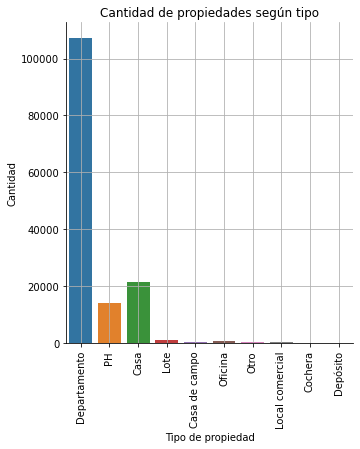

In [200]:
sns.catplot(data=data, x='property_type', kind="count")
plt.title("Cantidad de propiedades según tipo")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.grid()


4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

Del siguiente gráfico podemos extraer que la mayor cantidad de propiedades se encuentran ubicadas en Capital Federal y Zona Norte, predominando los departamentos por sobre otro tipo de propiedades.Tambien se puede observar que la cantidad y composición de propiedades ubicadas en Zona Sur y Zona Oeste es muy parecida

Text(22.461423611111115, 0.5, 'Cantidad')

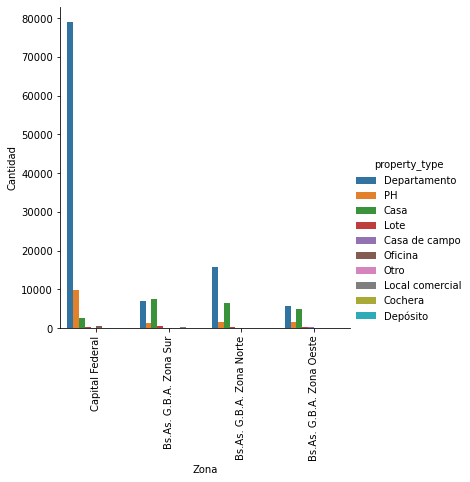

In [201]:
grafico_l2 = sns.catplot(data=data, x='l2', hue='property_type', kind='count')
plt.xticks(rotation=90)
plt.xlabel("Zona")
plt.ylabel("Cantidad")

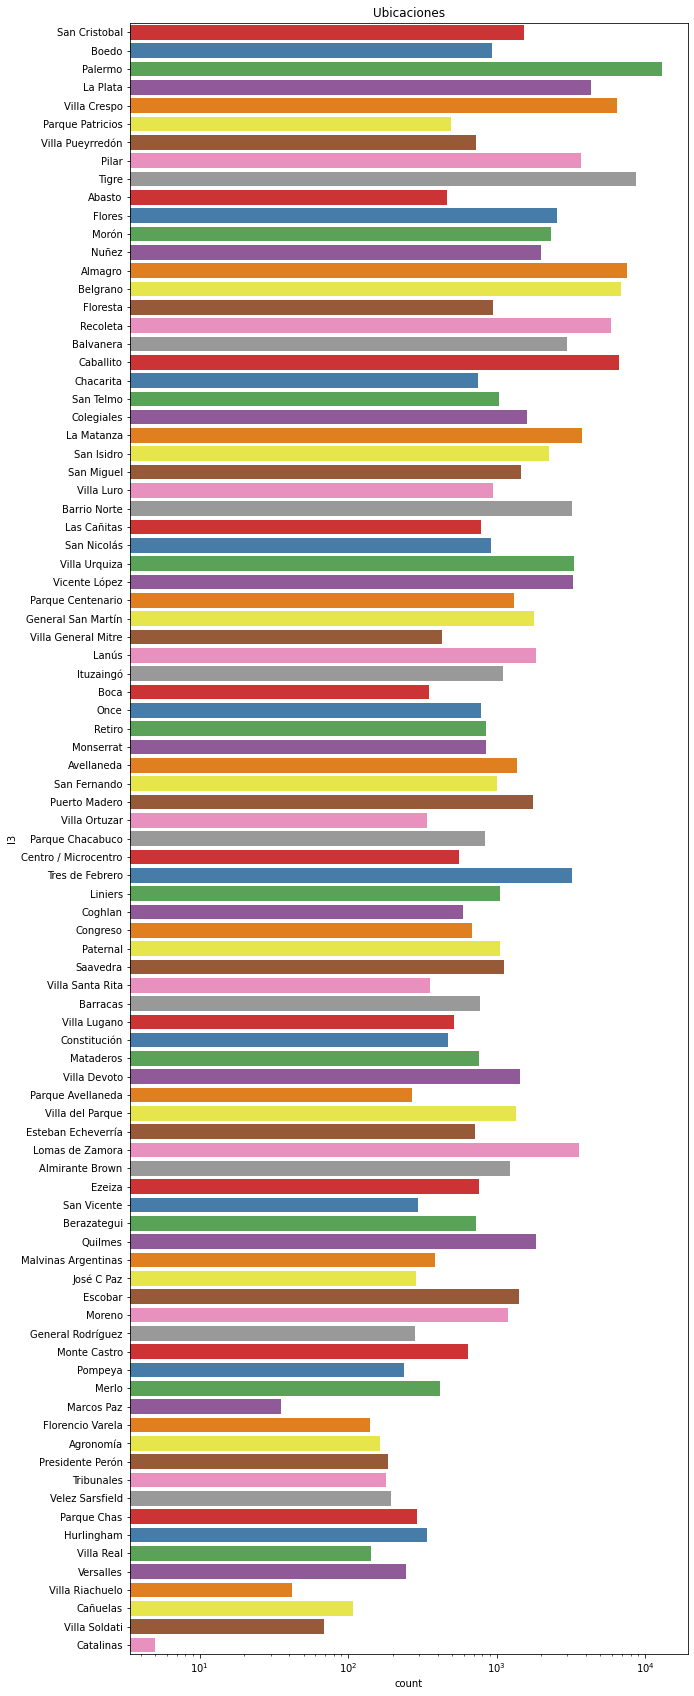

In [202]:
fig, graficox = plt.subplots(figsize=(10, 30))
grafico = sns.countplot(data=data, y="l3", palette="Set1")
grafico.set_title('Ubicaciones')
grafico.set_xscale("log")

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [203]:
data2 = data[data['l2'] == "Capital Federal"]
a = data2[data2["property_type"] == 'Departamento']
b = data2[data2["property_type"] == 'Casa']
c = data2[data2["property_type"] == 'PH']
a_b = a.append(b)
datos_abundantes = a_b.append(c)
datos_abundantes.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

La variable "estadisticos_listo" contiene aquellos estadisticos considerados relevantes para cada variable y, posteriormente, se exhibe para las propiedades en general y para cada tipo de propiedad un gráfico de cajas que muestra donde están ubicados la mayor cantidad de datos y outliers. Cabe mencionar que para determinar el rango de valores de cada variable se utilizó como parametro los estadisticos obtenidos. Luego, se muestra un histograma donde se puede observar el tipo de distribución de datos de las variables precio, superficie total y superficie cubierta para las propiedades en general y para cada tipo de propiedad y, finalmente, se exhibe un pairplot y un heatmap donde es posible observar la correlación entre las variables analizadas

In [204]:
estadisticos = datos_abundantes.describe()
estadisticos_listo = estadisticos.drop(['lat'], axis=1)
pd.options.display.float_format = '{:,.2f}'.format
estadisticos_listo

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,"91,485.00","91,485.00","91,485.00","91,485.00","91,485.00","91,485.00"
mean,2.96,1.96,1.55,112.65,95.44,"259,500.26"
std,1.31,1.07,0.85,931.72,738.23,"322,265.44"
min,1.00,0.00,1.00,10.00,1.00,"6,000.00"
25%,2.00,1.00,1.00,51.00,46.00,"120,000.00"
50%,3.00,2.00,1.00,77.00,67.18,"175,000.00"
75%,4.00,3.00,2.00,117.00,100.00,"279,000.00"
max,26.00,15.00,14.00,"126,062.00","126,062.00","32,434,232.00"


### PROPIEDADES EN GENERAL

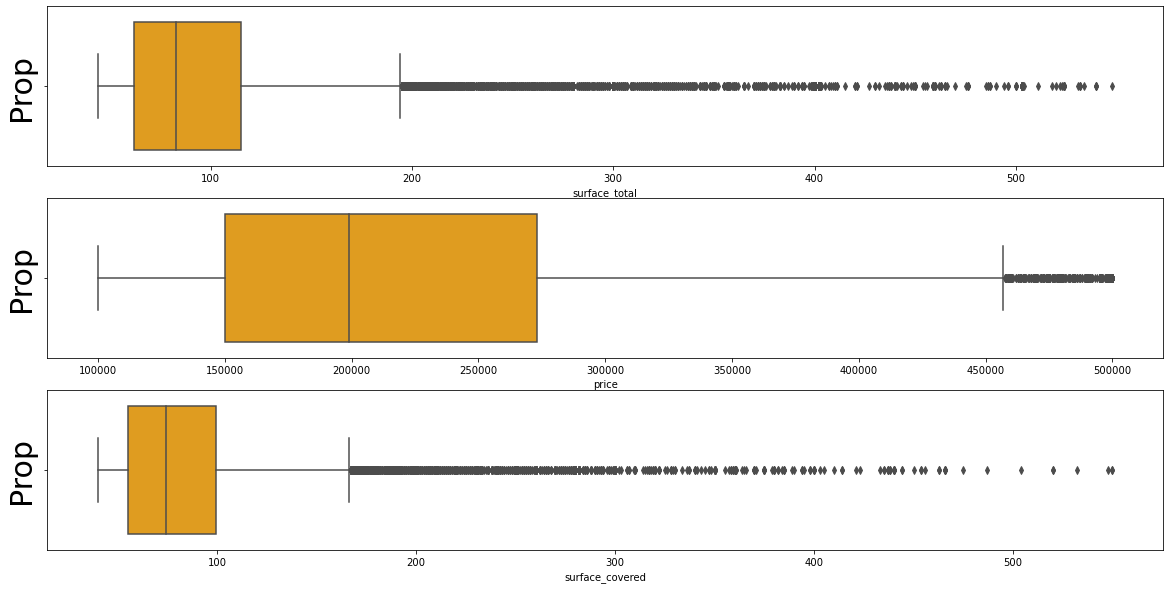

In [205]:
prop_mask = ((datos_abundantes['surface_total'] >= 44) &
             (datos_abundantes['surface_total'] <= 550) &
             (datos_abundantes['price'] <= 500000) &
             (datos_abundantes['price'] >= 100000) &
             (datos_abundantes['surface_covered'] >= 40) &
             (datos_abundantes['surface_covered'] <= 550))

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data=datos_abundantes[prop_mask], x='surface_total', color="orange")
plt.ylabel('Prop', size=30)

plt.subplot(3, 1, 2)
sns.boxplot(data=datos_abundantes[prop_mask], x='price', color="orange")
plt.ylabel('Prop', size=30)

plt.subplot(3, 1, 3)
sns.boxplot(data=datos_abundantes[prop_mask], x='surface_covered', color="orange")
plt.ylabel('Prop', size=30)

corr_prop = datos_abundantes[prop_mask].corr()

El grafico de cajas precedente y el histograma que se muestra a posteriori de este comentario, nos muestra que sin tener en cuenta el tipo de propiedad, el 50% de los datos de la variable superficie total se encuentra entre 50m2 y 130 m2, y que los datos se encuentran distribuidos de forma normal con un sesgo positivo, lo que indica que la mayor cantidad de observaciones presenta valores inferiores a la mediana. Por el largo de los bigotes podemos decir que los datos superiores a la mediana se encuentran más dispersos.
En términos generales, lo mismo ocurre con el comportamiento de los datos para la variable precio y superficie cubierta


/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

Text(0, 0.5, 'Prop')

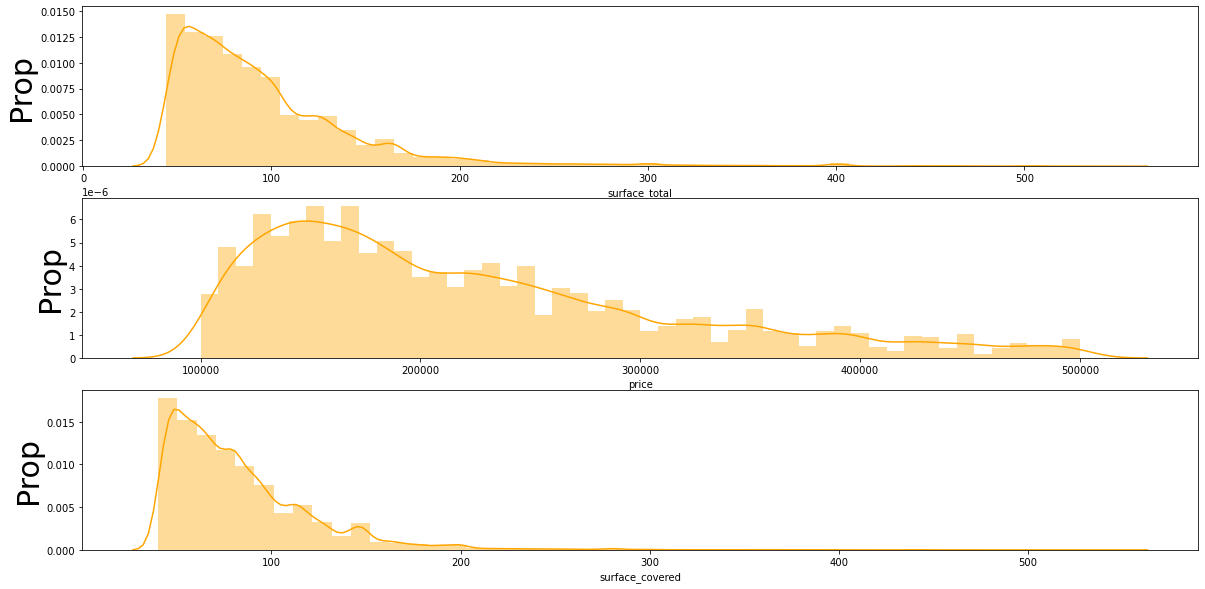

In [206]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.distplot(datos_abundantes[prop_mask]['surface_total'], color='orange')
plt.ylabel('Prop', size=30)

plt.subplot(3, 1, 2)
sns.distplot(datos_abundantes[prop_mask]['price'], color='orange')
plt.ylabel('Prop', size=30)

plt.subplot(3, 1, 3)
sns.distplot(datos_abundantes[prop_mask]['surface_covered'], color='orange')
plt.ylabel('Prop', size=30)

#### Explicación Pairplot y Heatmap

De ambos graficos obtener que la correlación entre las variables en general es baja, no encontrando una correlación directa elevada entre precio y cualquier otra variable. La correlación mas alta con la variable precio la tiene la variable superficie cubierta y cantidad de baños, lo cual guarda cierta lógica con el echo de que cuantos mas metros cuadrados tiene una propiedad (la correlación entre superficie total y superficie cubierta es elevada y casi igual respecto al precio), mas factible es de que tenga mas baños y que su precio sea mas alto. Cabe destacar que las variables rooms y bedrooms tienen entre si una correlación muy alta y a su vez, una correlación similar respecto a precio por lo que es factible que se pueda descartar del analisis alguna de las dos

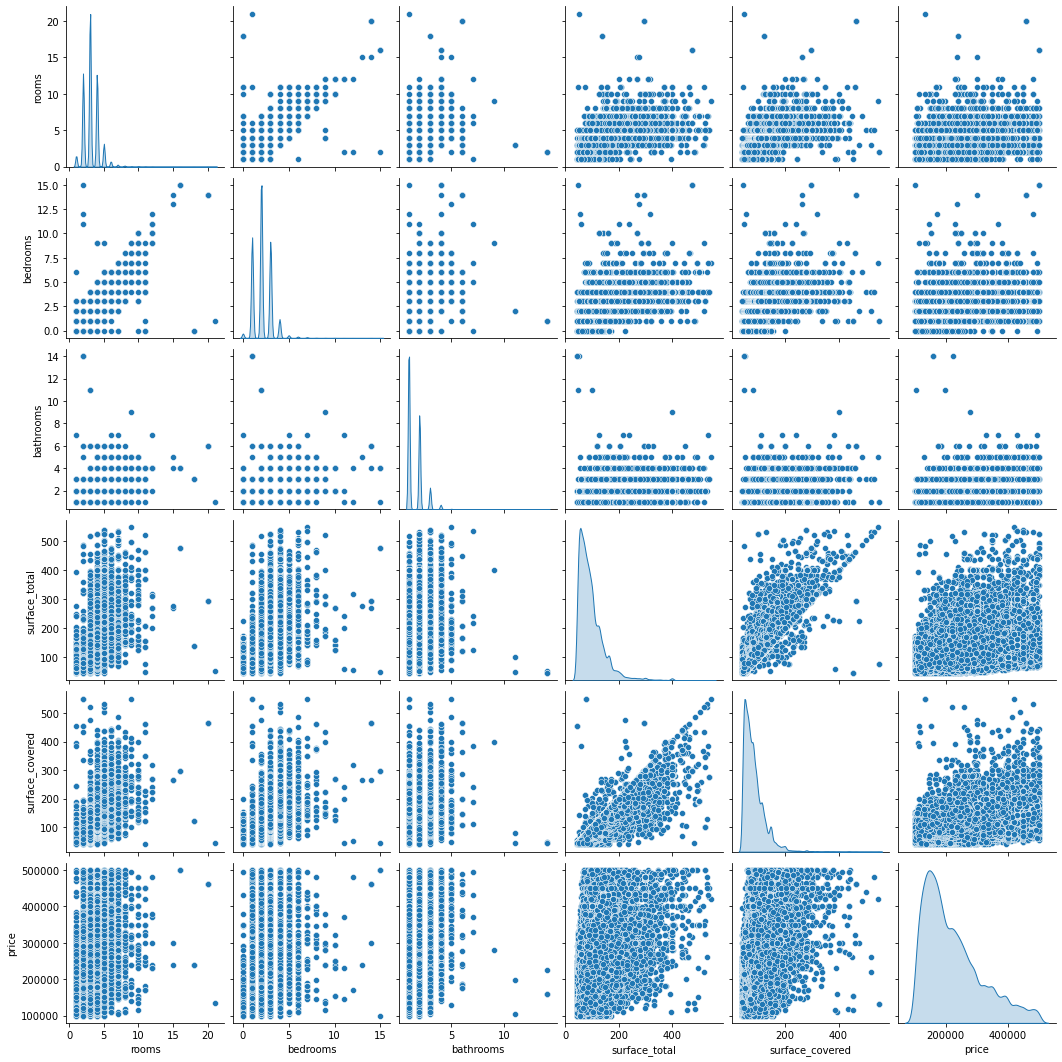

In [207]:
sns.pairplot(data=datos_abundantes[prop_mask].drop(['lat', 'lon'], axis=1), diag_kind='kde')

<AxesSubplot:>

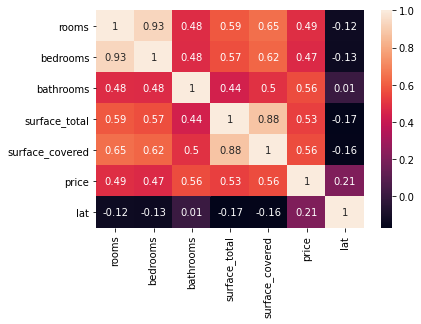

In [208]:
sns.heatmap(corr_prop, cbar=True, annot=True)

### DEPARTAMENTOS

In [209]:
estadisticos_dptos = datos_abundantes[datos_abundantes["property_type"] == 'Departamento'].describe().drop(['lat'],
                                                                                                           axis=1)
estadisticos_dptos

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,"79,029.00","79,029.00","79,029.00","79,029.00","79,029.00","79,029.00"
mean,2.81,1.84,1.52,100.10,87.48,"259,775.60"
std,1.20,0.97,0.84,622.12,468.95,"338,968.28"
min,1.00,0.00,1.00,10.00,1.00,"6,000.00"
25%,2.00,1.00,1.00,49.00,44.00,"119,000.00"
50%,3.00,2.00,1.00,72.00,64.00,"170,000.00"
75%,4.00,2.00,2.00,104.00,93.00,"269,000.00"
max,21.00,15.00,14.00,"108,960.00","104,890.00","32,434,232.00"


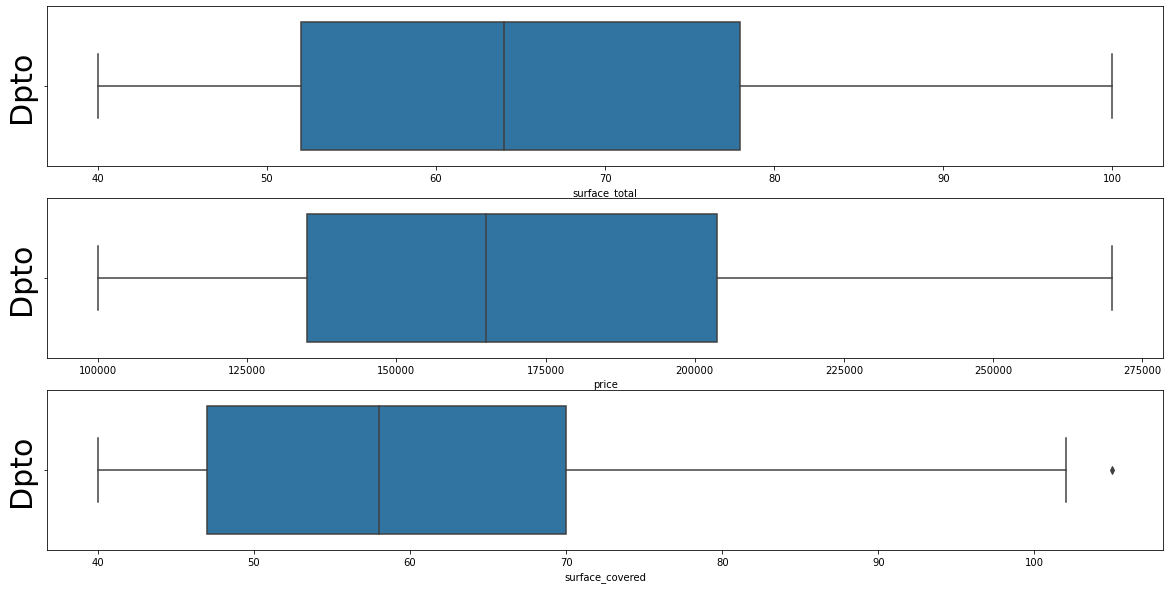

In [210]:
dptos_mask = ((datos_abundantes['surface_total'] >= 40) &
              (datos_abundantes['surface_total'] <= 100) &
              (datos_abundantes['price'] <= 270000) &
              (datos_abundantes['price'] >= 100000) &
              (datos_abundantes['property_type'] == 'Departamento') &
              (datos_abundantes['surface_covered'] >= 40) &
              (datos_abundantes['surface_covered'] <= 120))

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data=datos_abundantes[dptos_mask], x='surface_total')
plt.ylabel('Dpto', size=30)

plt.subplot(3, 1, 2)
sns.boxplot(data=datos_abundantes[dptos_mask], x='price')
plt.ylabel('Dpto', size=30)

plt.subplot(3, 1, 3)
sns.boxplot(data=datos_abundantes[dptos_mask], x='surface_covered')
plt.ylabel('Dpto', size=30)

corr_dpto = datos_abundantes[dptos_mask].corr()


Del grafico de cajas que respresenta la distribución de datos de departamentos y el histograma que se muestra a posteriori de este comentario, podemos concluir que, el 50% de los datos de la variable superficie total se encuentra entre 53m2 y 78 m2, y que los datos se encuentran distribuidos de forma normal con un leve sesgo positivo, lo cual indica que los datos se encuentran distribuidos de forma homogenea. Por el largo de los bigotes podemos decir que los datos superiores a la mediana se encuentran más dispersos pero no de manera significativa.
En términos generales, lo mismo ocurre con el comportamiento de los datos para la variable precio y superficie cubierta

/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

Text(0, 0.5, 'Dpto')

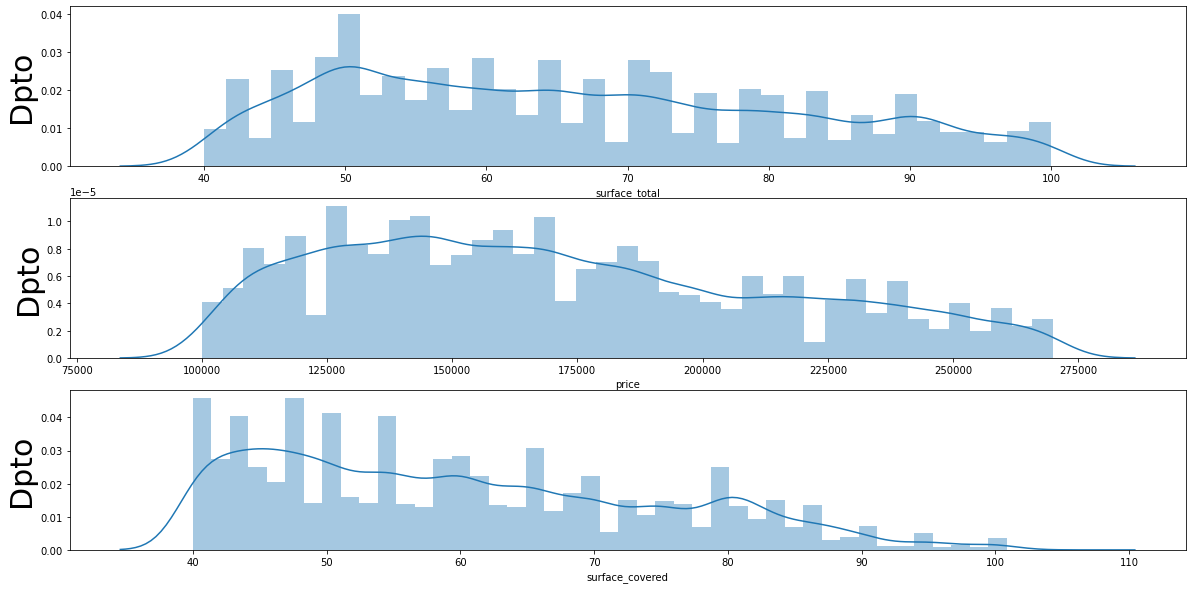

In [211]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.distplot(datos_abundantes[dptos_mask]['surface_total'])
plt.ylabel('Dpto', size=30)

plt.subplot(3, 1, 2)
sns.distplot(datos_abundantes[dptos_mask]['price'])
plt.ylabel('Dpto', size=30)

plt.subplot(3, 1, 3)
sns.distplot(datos_abundantes[dptos_mask]['surface_covered'])
plt.ylabel('Dpto', size=30)

#### Explicación heatmap y pairplot

Del pairplot y heatmap podemos obtener que la correlación entre las variables en general es baja, no encontrando una relación directa entre precio y cualquier otra variable. La correlación mas alta con la variable precio la tiene la variable superficie total y superficie cubierta, lo cual guarda cierta lógica con el echo de que cuantos mas metros cuadrados tiene una propiedad mayor es su precio total. Cabe destacar que las variables rooms y bedrooms tienen entre si una correlación muy alta y a su vez, una correlación similar respecto a precio por lo que es factible que se pueda descartar del analisis alguna de las dos.Por último, el pairplot muestra que las variables bedrooms, rooms y bathrooms casi no tienen relación con el precio ya que diferentes propiedades con mayor cantidad de bedrooms, rooms y bathrooms no tienen un precio mayor necesariamente, respecto de las variables restantes se puede observar una dispersión total no pudiendo identificar ninguna relación respecto al precio 

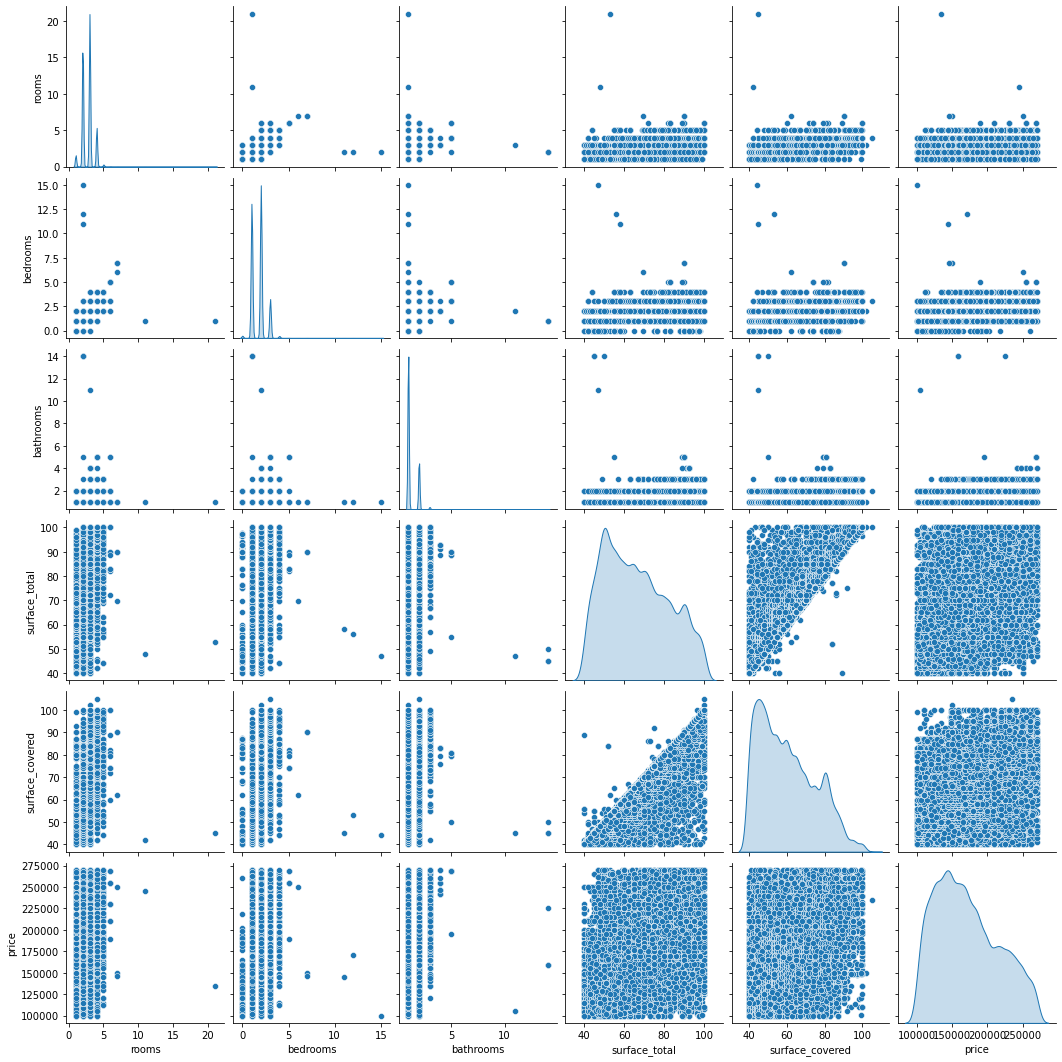

In [212]:
sns.pairplot(data=datos_abundantes[dptos_mask].drop(['lat', 'lon'], axis=1), diag_kind='kde')

<AxesSubplot:>

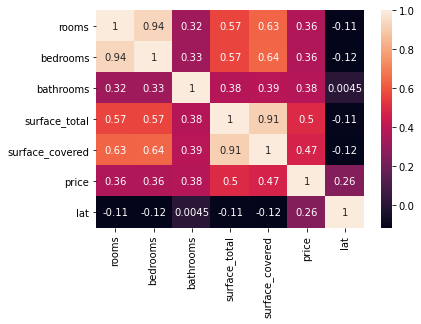

In [213]:
sns.heatmap(corr_dpto, cbar=True, annot=True)

### CASAS

In [214]:
estadisticos_casa = datos_abundantes[datos_abundantes["property_type"] == 'Casa'].describe().drop(['lat'], axis=1)
estadisticos_casa

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,"2,692.00","2,692.00","2,692.00","2,692.00","2,692.00","2,692.00"
mean,4.91,3.48,2.29,250.87,201.89,"397,556.94"
std,1.84,1.36,1.17,326.82,368.03,"286,946.29"
min,1.00,0.00,1.00,25.00,25.00,"30,000.00"
25%,4.00,3.00,1.00,136.00,114.00,"240,000.00"
50%,5.00,3.00,2.00,200.00,160.00,"330,000.00"
75%,6.00,4.00,3.00,304.00,241.00,"480,000.00"
max,26.00,15.00,10.00,"13,250.00","17,220.00","5,000,000.00"


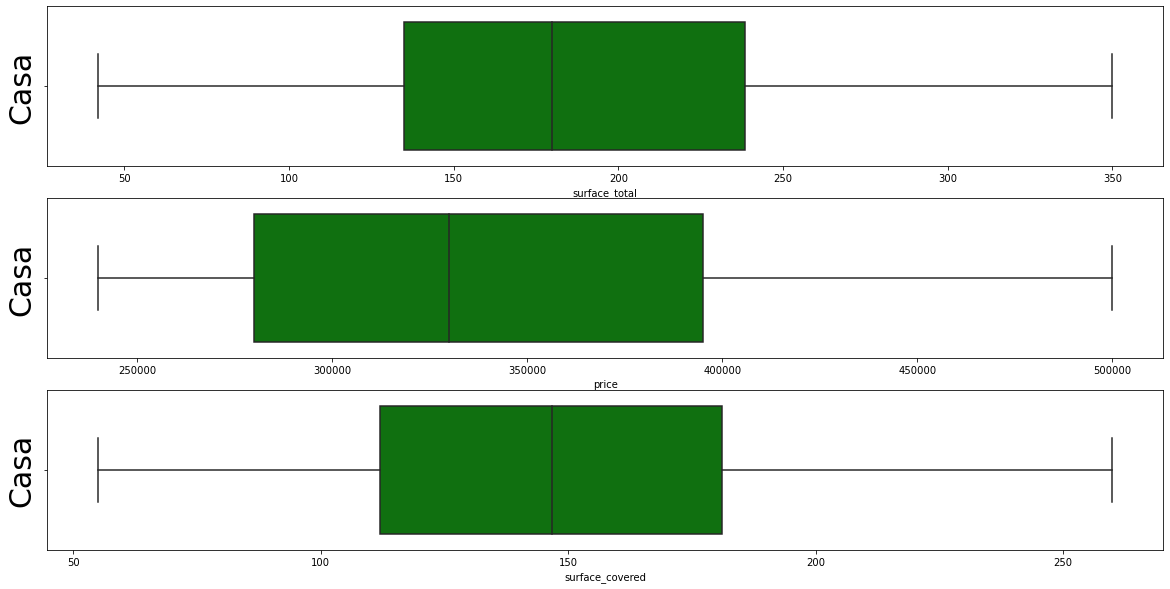

In [215]:
casa_mask = ((datos_abundantes['surface_total'] >= 40) &
             (datos_abundantes['surface_total'] <= 350) &
             (datos_abundantes['price'] >= 240000) &
             (datos_abundantes['price'] <= 500000) &
             (datos_abundantes['property_type'] == 'Casa') &
             (datos_abundantes['surface_covered'] >= 40) &
             (datos_abundantes['surface_covered'] <= 260))

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data=datos_abundantes[casa_mask], x='surface_total', color="g")
plt.ylabel('Casa', size=30)

plt.subplot(3, 1, 2)
sns.boxplot(data=datos_abundantes[casa_mask], x='price', color="g")
plt.ylabel('Casa', size=30)

plt.subplot(3, 1, 3)
sns.boxplot(data=datos_abundantes[casa_mask], x='surface_covered', color="g")
plt.ylabel('Casa', size=30)

corr_casa = datos_abundantes[casa_mask].corr()


In [216]:
data = datos_abundantes[casa_mask]

Lo mencionado anteriormente en el analisis de datos de departamentos es válido tanto para el analisis de la información que se desprende de los graficos de caja,histograma, pairplot y heatmap de casas como de PH

/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

Text(0, 0.5, 'Casa')

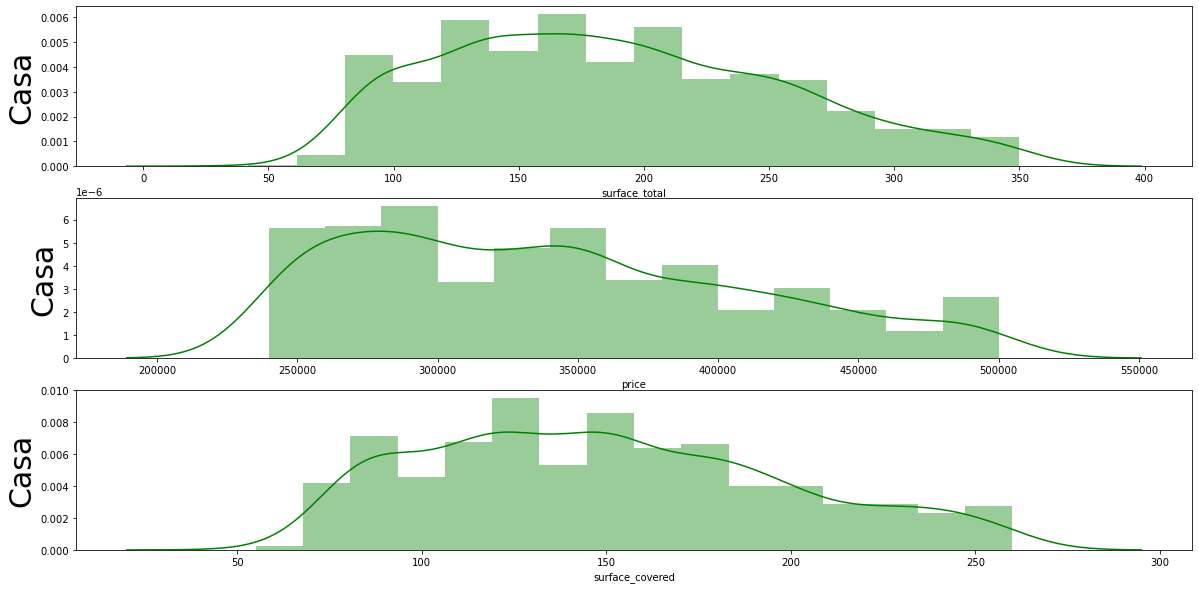

In [217]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.distplot(datos_abundantes[casa_mask]['surface_total'], color="g")
plt.ylabel('Casa', size=30)

plt.subplot(3, 1, 2)
sns.distplot(datos_abundantes[casa_mask]['price'], color="g")
plt.ylabel('Casa', size=30)

plt.subplot(3, 1, 3)
sns.distplot(datos_abundantes[casa_mask]['surface_covered'], color="g")
plt.ylabel('Casa', size=30)

#### Explicacion Heatmap y pairplot 

Del pairplot y heatmap podemos obtener que la correlación entre las variables en general es baja, no encontrando una relación directa entre precio y cualquier otra variable. La correlación mas alta con la variable precio la tiene la variable bathrooms, aunque es importante mencionar que es una correlación baja. El pairplot muestra que las variables bedrooms, rooms y bathrooms casi no tienen relación con el precio ya que diferentes propiedades con mayor cantidad de bedrooms, rooms y bathrooms no tienen un precio mayor necesariamente, respecto de las variables restantes se puede observar una dispersión total no pudiendo identificar ninguna relación respecto al precio. 

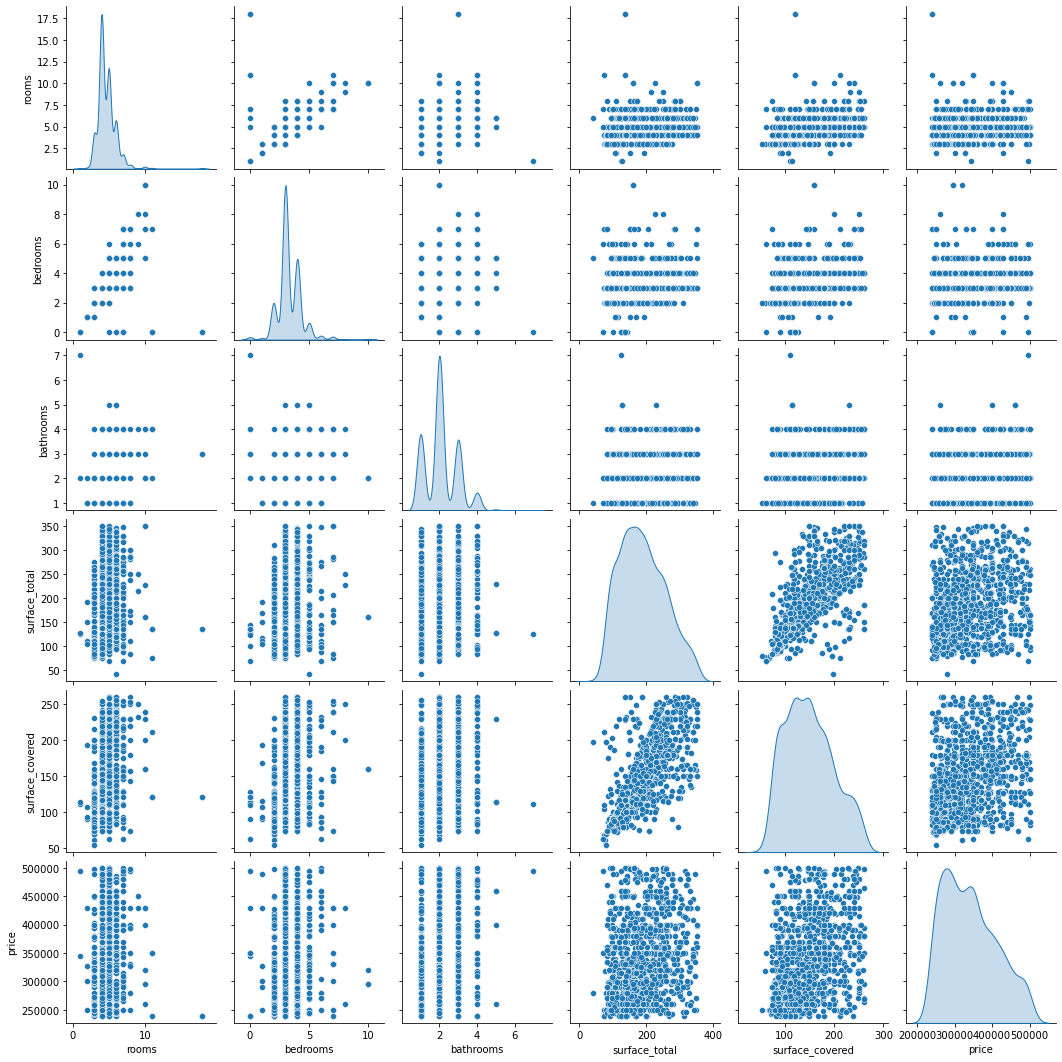

In [218]:
sns.pairplot(data=datos_abundantes[casa_mask].drop(['lat', 'lon'], axis=1), diag_kind='kde')

<AxesSubplot:>

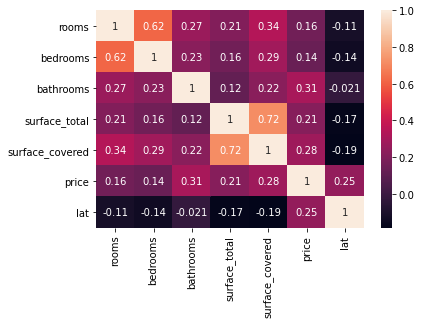

In [219]:
sns.heatmap(corr_casa, cbar=True, annot=True)

# PH

In [220]:
estadisticos_PH = datos_abundantes[datos_abundantes["property_type"] == 'PH'].describe().drop(['lat'], axis=1)
estadisticos_PH

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,"9,764.00","9,764.00","9,764.00","9,764.00","9,764.00","9,764.00"
mean,3.64,2.54,1.56,176.10,130.52,"219,208.55"
std,1.38,1.24,0.79,"2,227.49","1,812.29","116,302.51"
min,1.00,0.00,1.00,10.00,1.00,"27,000.00"
25%,3.00,2.00,1.00,70.00,58.00,"135,000.00"
50%,3.00,2.00,1.00,105.00,84.00,"191,500.00"
75%,4.00,3.00,2.00,152.00,123.00,"270,000.00"
max,16.00,15.00,11.00,"126,062.00","126,062.00","1,750,000.00"


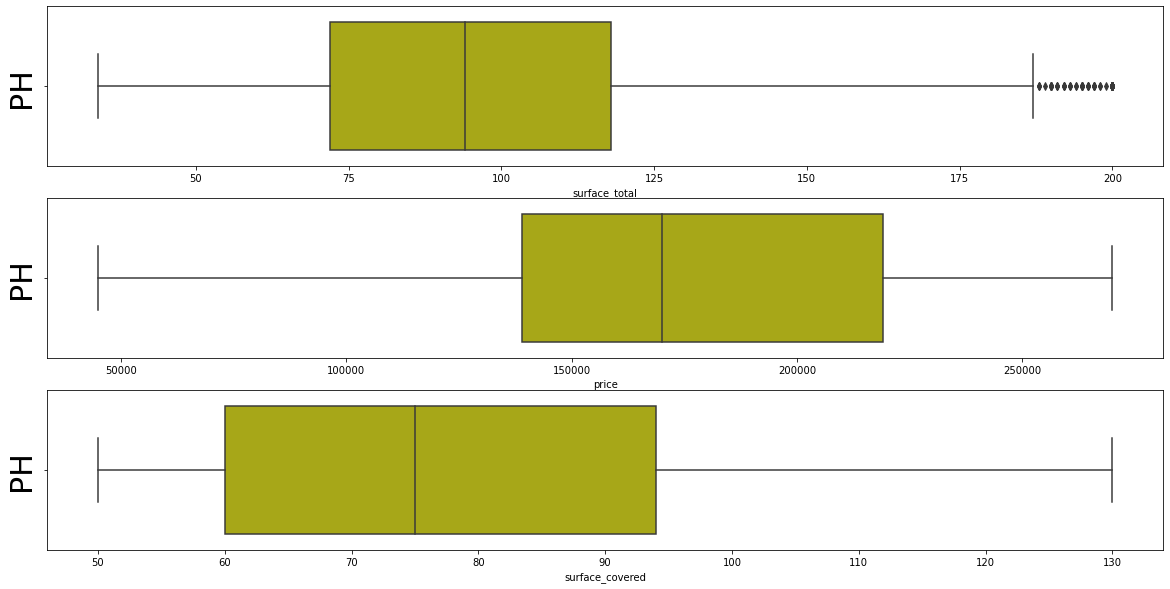

In [221]:
PH_mask = ((datos_abundantes['surface_total'] >= 30) &
           (datos_abundantes['surface_total'] <= 200) &
           (datos_abundantes['price'] >= 25000) &
           (datos_abundantes['price'] <= 270000) &
           (datos_abundantes['property_type'] == 'PH') &
           (datos_abundantes['surface_covered'] >= 50) &
           (datos_abundantes['surface_covered'] <= 130))

plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.boxplot(data=datos_abundantes[PH_mask], x='surface_total', color="y")
plt.ylabel('PH', size=30)

plt.subplot(3, 1, 2)
sns.boxplot(data=datos_abundantes[PH_mask], x='price', color="y")
plt.ylabel('PH', size=30)

plt.subplot(3, 1, 3)
sns.boxplot(data=datos_abundantes[PH_mask], x='surface_covered', color="y")
plt.ylabel('PH', size=30)

corr_ph = datos_abundantes[PH_mask].corr()

/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/Caskroom/miniconda/base/envs/acamica/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

Text(0, 0.5, 'PH')

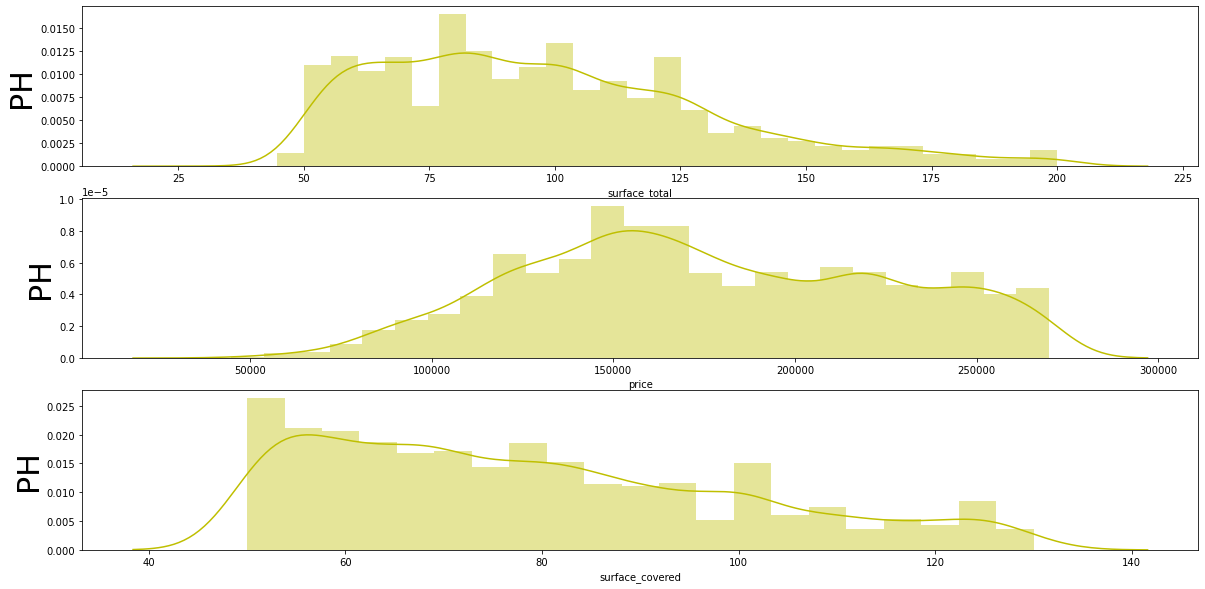

In [222]:
plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.distplot(datos_abundantes[PH_mask]['surface_total'], color="y")
plt.ylabel('PH', size=30)

plt.subplot(3, 1, 2)
sns.distplot(datos_abundantes[PH_mask]['price'], color="y")
plt.ylabel('PH', size=30)

plt.subplot(3, 1, 3)
sns.distplot(datos_abundantes[PH_mask]['surface_covered'], color="y")
plt.ylabel('PH', size=30)

#### Explicación Heatmap y Pairplot


Del pairplot y heatmap podemos obtener que la correlación entre las variables en general es baja, no encontrando una relación directa entre precio y cualquier otra variable. La correlación mas alta con la variable precio la tiene la variable superficie  cubierta y rooms, lo cual guarda cierta lógica con el echo de que cuantos mas metros cuadrados tiene una propiedad mayor es su precio total y cuanto mas habitaciones mas superficie total. Cabe destacar que las variables rooms y bedrooms tienen entre si una correlación muy alta y a su vez, una correlación similar respecto a precio por lo que es factible que se pueda descartar del analisis alguna de las dos.Por último, el pairplot muestra que las variables bedrooms, rooms y bathrooms casi no tienen relación con el precio ya que diferentes propiedades con mayor cantidad de bedrooms, rooms y bathrooms no tienen un precio mayor necesariamente, respecto de las variables restantes se puede observar una dispersión total no pudiendo identificar ninguna relación respecto al precio 

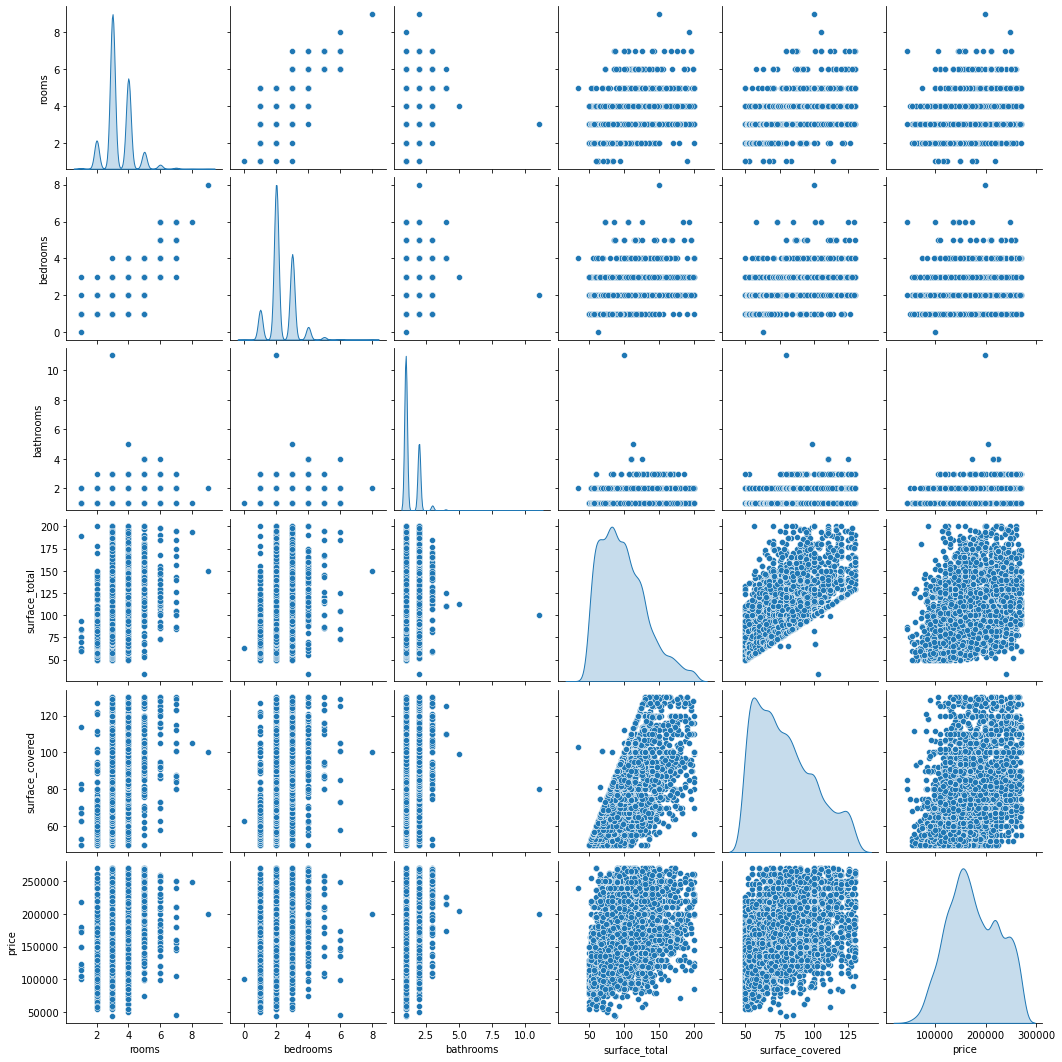

In [223]:
sns.pairplot(data=datos_abundantes[PH_mask].drop(['lat'], axis=1), diag_kind='kde')

<AxesSubplot:>

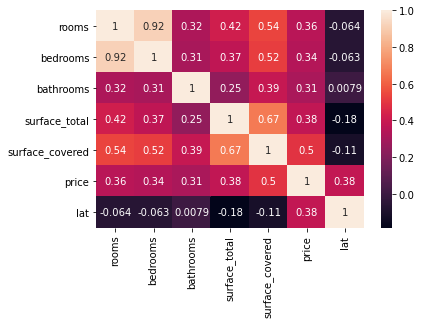

In [224]:
sns.heatmap(corr_ph, cbar=True, annot=True)

In [225]:
grafico = sns.FacetGrid(datos_abundantes[PH_mask], col='l3', hue='l3', height=15)
grafico.map(sns.scatterplot, 'price', 'surface_total')
grafico.set_axis_labels('Precio', 'Superficie Total')
grafico.set_titles(size=15)
plt.show()

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

El apartado 7 fue respondiendo en el analisis de gráficos precedente


### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.



### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [226]:
dataset = datos_abundantes[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
mascara2 = ((dataset['surface_total'] >= 15) &
            (dataset['surface_total'] <= 1000) &
            (dataset['price'] <= 4000000))

dataset_PH = dataset[((dataset['surface_total'] >= 15) &
                      (dataset['surface_total'] <= 1000) &
                      (dataset['price'] <= 4000000) &
                      (datos_abundantes['property_type'] == 'PH'))]
dataset_casa = dataset[((dataset['surface_total'] >= 15) &
                        (dataset['surface_total'] <= 1000) &
                        (dataset['price'] <= 4000000) &
                        (datos_abundantes['property_type'] == 'Casa'))]
dataset_dpto = dataset[((dataset['surface_total'] >= 15) &
                        (dataset['surface_total'] <= 1000) &
                        (dataset['price'] <= 4000000) &
                        (datos_abundantes['property_type'] == 'Departamento'))]
dataset_prop = dataset[mascara2]

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

A continuación defino las variables x('rooms', 'bedrooms','bathrooms','surface_total','surface_covered'), que son aquellas que el modelo va a utilizar para predecir y(precio). Posteriormente  defino los valores que el modelo va a entrenar y testear por medio del metodo train_test_split

In [228]:
X = dataset_prop[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y = dataset_prop['price']

x_dpto = dataset_dpto[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y_dpto = dataset_dpto['price']

x_casa = dataset_casa[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y_casa = dataset_casa['price']

x_ph = dataset_PH[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']]
y_ph = dataset_PH['price']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_dpto, X_test_dpto, y_train_dpto, y_test_dpto = train_test_split(x_dpto, y_dpto, test_size=0.33, random_state=42)
X_train_casa, X_test_casa, y_train_casa, y_test_casa = train_test_split(x_casa, y_casa, test_size=0.33, random_state=42)
X_train_ph, X_test_ph, y_train_ph, y_test_ph = train_test_split(x_ph, y_ph, test_size=0.33, random_state=42)


### Regresion Lineal

Creo el objeto modelo que posteriormente voy a entrenar

In [230]:
regresor_lineal = LinearRegression()
regresor_lineal_dpto = LinearRegression()
regresor_lineal_casa = LinearRegression()
regresor_lineal_PH = LinearRegression()

Entreno el modelo creado con las variables definidas anteriormente

In [231]:
regresor_lineal.fit(X_train, y_train)
regresor_lineal.fit(X_train_dpto, y_train_dpto)
regresor_lineal.fit(X_train_casa, y_train_casa)
regresor_lineal.fit(X_train_ph, y_train_ph)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
train_predict = regresor_lineal.predict(X_train)
test_predict = regresor_lineal.predict(X_test)

train_predict_dpto = regresor_lineal.predict(X_train_dpto)
test_predict_dpto = regresor_lineal.predict(X_test_dpto)

train_predict_casa = regresor_lineal.predict(X_train_casa)
test_predict_casa = regresor_lineal.predict(X_test_casa)

train_predict_ph = regresor_lineal.predict(X_train_ph)
test_predict_ph = regresor_lineal.predict(X_test_ph)

Evaluacion del modelo bajo RMSE, se escogió el método de evaluación RMSE ya que la función accuracy_score y la matriz de confusión sirven para evaluar problemas de clasificación y el problema actual es de regresión

In [233]:
train_rmse2 = np.sqrt(mean_squared_error(train_predict, y_train))
test_rmse2 = np.sqrt(mean_squared_error(test_predict, y_test))
print('El error del train prop es', train_rmse2)
print('El error del test prop es', test_rmse2)

El error del train prop es 249662.32674095765
El error del test prop es 246059.08544457282


In [234]:
train_rmse2_dpto = np.sqrt(mean_squared_error(train_predict_dpto, y_train_dpto))
test_rmse2_dpto = np.sqrt(mean_squared_error(test_predict_dpto, y_test_dpto))
print('El error del train dpto es', train_rmse2_dpto)
print('El error del test dpto es', test_rmse2_dpto)

El error del train dpto es 261101.58785688662
El error del test dpto es 266661.7736234137


In [235]:
train_rmse2_casa = np.sqrt(mean_squared_error(train_predict_casa, y_train_casa))
test_rmse2_casa = np.sqrt(mean_squared_error(test_predict_casa, y_test_casa))
print('El error del train casa es', train_rmse2_casa)
print('El error del test casa es', test_rmse2_casa)

El error del train casa es 221521.67626017504
El error del test casa es 205438.75832543278


In [236]:

train_rmse2_ph = np.sqrt(mean_squared_error(train_predict_ph, y_train_ph))
test_rmse2_ph = np.sqrt(mean_squared_error(test_predict_ph, y_test_ph))
print('El error del train ph es', train_rmse2_ph)
print('El error del test ph es', test_rmse2_ph)

El error del train ph es 75918.086608154
El error del test ph es 79662.19961416353


### VECINOS MAS CERCANOS

In [237]:
knn_prop = KNeighborsRegressor(12)

#Vecinos mas cercanos
knn_dpto = KNeighborsRegressor(12)
knn_casa = KNeighborsRegressor(20)
knn_ph = KNeighborsRegressor(15)

knn_prop.fit(X_train, y_train)
knn_dpto.fit(X_train_dpto, y_train_dpto)
knn_casa.fit(X_train_casa, y_train_casa)
knn_ph.fit(X_train_ph, y_train_ph)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

El hiperparametro de cantidad de vecinos mas cercanos fue definido en función de los gráficos que a continuación se exponen en donde se muestra el error de train y de test respectivamente para cada tipo de propiedad utilizando como criterio la relación de cercanía (train-test) y error minimo (test)

In [238]:
train_predict_knn_prop = knn_prop.predict(X_train)
test_predict_knn_prop = knn_prop.predict(X_test)

train_predict_knn_dpto = knn_dpto.predict(X_train_dpto)
test_predict_knn_dpto = knn_dpto.predict(X_test_dpto)

train_predict_knn_casa = knn_casa.predict(X_train_casa)
test_predict_knn_casa = knn_casa.predict(X_test_casa)

train_predict_knn_ph = knn_ph.predict(X_train_ph)
test_predict_knn_ph = knn_ph.predict(X_test_ph)



In [239]:
def rgk(titulo, k_vecinos, X_train, X_test, y_train, y_test):
    # Definimos las listas vacias para los valores de error deseados
    lista_error_train = []
    lista_error_test = []

    for k in k_vecinos:
        # Definir el modelo con el valor de vecinos deseado
        knn = KNeighborsRegressor(n_neighbors=k)

        # Entrenar el modelo
        knn.fit(X_train, y_train)

        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = knn.predict(X_train)
        train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = knn.predict(X_test)
        test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Agregar la información a las listas
        lista_error_train.append(train_err)
        lista_error_test.append(test_err)

    plt.plot(k_vecinos, lista_error_train, 'o-', label='train')
    plt.plot(k_vecinos, lista_error_test, 'o-', label='test')
    plt.legend()
    plt.title(titulo)
    plt.xlabel('k_vecinos')
    plt.ylabel('Error')
    plt.ylabel('Error')

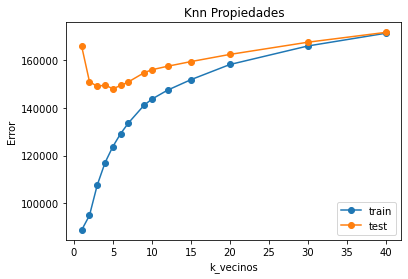

In [240]:
q_vecinos_prop = [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 15, 20, 30, 40]

vecinos_prop = rgk('Knn Propiedades', q_vecinos_prop, X_train, X_test, y_train, y_test)

In [241]:
train_rmse2_knn_prop = np.sqrt(mean_squared_error(train_predict_knn_prop, y_train))
test_rmse2_knn_prop = np.sqrt(mean_squared_error(test_predict_knn_prop, y_test))
print('El error del train prop es', train_rmse2_knn_prop)
print('El error del test prop es', test_rmse2_knn_prop)

El error del train prop es 147504.18162116656
El error del test prop es 157554.74403064576


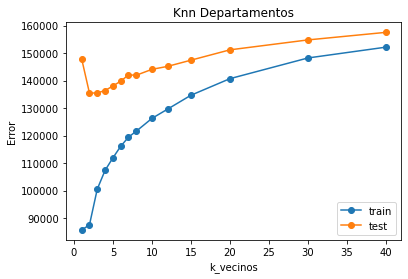

In [242]:
q_vecinos_dpto = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30, 40]

vecinos_dpto = rgk('Knn Departamentos', q_vecinos_dpto, X_train_dpto, X_test_dpto, y_train_dpto, y_test_dpto)

In [243]:
train_rmse2_knn_dpto = np.sqrt(mean_squared_error(train_predict_knn_dpto, y_train_dpto))
test_rmse2_knn_dpto = np.sqrt(mean_squared_error(test_predict_knn_dpto, y_test_dpto))
print('El error del train dpto es', train_rmse2_knn_dpto)
print('El error del test dpto es', test_rmse2_knn_dpto)

El error del train dpto es 129610.25108809595
El error del test dpto es 145154.22198523683


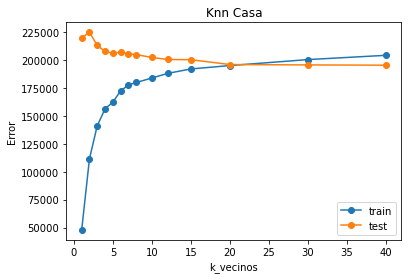

In [244]:
q_vecinos_casa = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30, 40]

vecinos_casa = rgk('Knn Casa', q_vecinos_casa, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

In [245]:
train_rmse2_knn_casa = np.sqrt(mean_squared_error(train_predict_knn_casa, y_train_casa))
test_rmse2_knn_casa = np.sqrt(mean_squared_error(test_predict_knn_casa, y_test_casa))
print('El error del train casa es', train_rmse2_knn_casa)
print('El error del test casa es', test_rmse2_knn_casa)

El error del train casa es 195231.53631215036
El error del test casa es 196140.2360723279


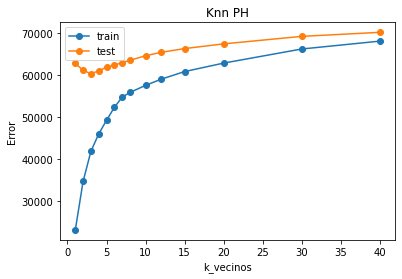

In [246]:
q_vecinos_ph = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 30, 40]

vecinos_ph = rgk('Knn PH', q_vecinos_ph, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

In [247]:
train_rmse2_knn_ph = np.sqrt(mean_squared_error(train_predict_knn_ph, y_train_ph))
test_rmse2_knn_ph = np.sqrt(mean_squared_error(test_predict_knn_ph, y_test_ph))
print('El error del train ph es', train_rmse2_knn_ph)
print('El error del test ph es', test_rmse2_knn_ph)

El error del train ph es 60768.10481887255
El error del test ph es 66238.40790640276


### Arbol de decisión

In [248]:
#Arboles de desicion
arbol_prop = DecisionTreeRegressor(max_depth=7, random_state=42)
arbol_casa = DecisionTreeRegressor(max_depth=7, random_state=42)
arbol_dpto = DecisionTreeRegressor(max_depth=7, random_state=42)
arbol_ph = DecisionTreeRegressor(max_depth=7, random_state=42)

arbol_prop.fit(X_train, y_train)
arbol_casa.fit(X_train_casa, y_train_casa)
arbol_dpto.fit(X_train_dpto, y_train_dpto)
arbol_ph.fit(X_train_ph, y_train_ph)

train_predict_arbol_prop = arbol_prop.predict(X_train)
test_predict_arbol_prop = arbol_prop.predict(X_test)

train_predict_arbol_dpto = arbol_dpto.predict(X_train_dpto)
test_predict_arbol_dpto = arbol_dpto.predict(X_test_dpto)

train_predict_arbol_casa = arbol_casa.predict(X_train_casa)
test_predict_arbol_casa = arbol_casa.predict(X_test_casa)

train_predict_arbol_ph = arbol_ph.predict(X_train_ph)
test_predict_arbol_ph = arbol_ph.predict(X_test_ph)

El hiperparametro de profundidad de arbol de decisión fue definido en función de los gráficos que a continuación se exponen en donde se muestra el error de train y de test respectivamente para cada tipo de propiedad utilizando como criterio la relación de cercanía (train-test) y error minimo (test)

In [249]:
def dep_tree(titulo, depth, X_train, X_test, y_train, y_test):
    # Definimos las listas vacias para los valores de depth deseados
    lista_accuracy_train = []
    lista_accuracy_test = []

    # Definimos la lista de valores de max_depth que vamos a explorar
    max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20]

    # Generamos en loop sobre los distintos valores de profundidad
    for max_depth in max_depths:
        # Vamos a repetir el siguiente bloque de código

        # Definir el modelo con el valor de profundidad
        arbol_dec = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # Entrenar el modelo
        arbol_dec.fit(X_train, y_train)

        # Predecir y evaluar sobre el set de entrenamiento
        y_train_pred = arbol_dec.predict(X_train)
        train_err = np.sqrt(mean_squared_error(y_train, y_train_pred))

        # Predecir y evaluar sobre el set de evaluación
        y_test_pred = arbol_dec.predict(X_test)
        test_err = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Agregar la información a las listas
        lista_accuracy_train.append(train_err)
        lista_accuracy_test.append(test_err)
    #Graficamos
    plt.plot(max_depths, lista_accuracy_train, 'o-', label='train')
    plt.plot(max_depths, lista_accuracy_test, 'o-', label='test')
    plt.legend()
    plt.xlabel('Profundidad del árbol')
    plt.ylabel('Error')

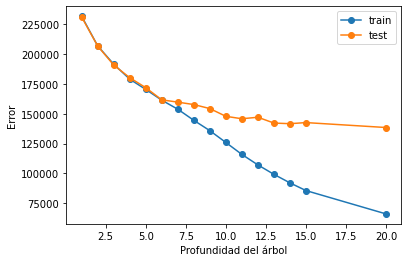

In [250]:
dep_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
dep_tree('Arbol de decisión', dep_lista, X_train, X_test, y_train, y_test)

In [251]:
train_rmse2_arbol_prop = np.sqrt(mean_squared_error(train_predict_arbol_prop, y_train))
test_rmse2_arbol_prop = np.sqrt(mean_squared_error(test_predict_arbol_prop, y_test))
print('El error del train prop es', train_rmse2_arbol_prop)
print('El error del test prop es', test_rmse2_arbol_prop)

El error del train prop es 153767.03336852815
El error del test prop es 159693.02909272898


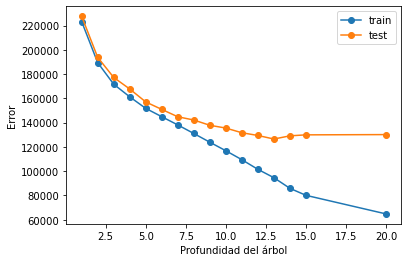

In [252]:
dep_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
dep_tree('Arbol de decisión', dep_lista, X_train_dpto, X_test_dpto, y_train_dpto, y_test_dpto)

In [253]:
train_rmse2_arbol_dpto = np.sqrt(mean_squared_error(train_predict_arbol_dpto, y_train_dpto))
test_rmse2_arbol_dpto = np.sqrt(mean_squared_error(test_predict_arbol_dpto, y_test_dpto))
print('El error del train dpto es', train_rmse2_arbol_dpto)
print('El error del test dpto es', test_rmse2_arbol_dpto)

El error del train dpto es 138103.12987581658
El error del test dpto es 144831.4883105782


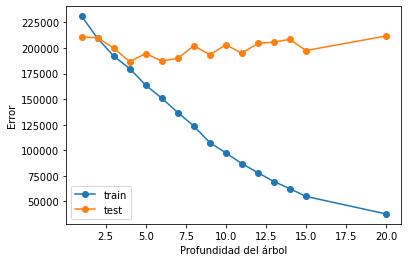

In [254]:
dep_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
dep_tree('Arbol de decisión', dep_lista, X_train_casa, X_test_casa, y_train_casa, y_test_casa)

In [255]:
train_rmse2_arbol_casa = np.sqrt(mean_squared_error(train_predict_arbol_casa, y_train_casa))
test_rmse2_arbol_casa = np.sqrt(mean_squared_error(test_predict_arbol_casa, y_test_casa))
print('El error del train casa es', train_rmse2_arbol_casa)
print('El error del test casa es', test_rmse2_arbol_casa)

El error del train casa es 136904.4824175971
El error del test casa es 189865.8162585799


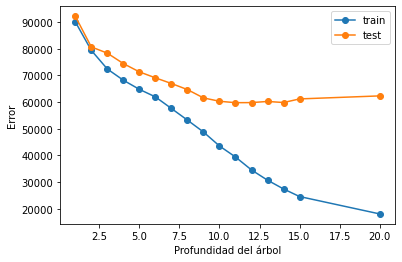

In [256]:
dep_lista = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
dep_tree('Arbol de decisión', dep_lista, X_train_ph, X_test_ph, y_train_ph, y_test_ph)

In [257]:
train_rmse2_arbol_ph = np.sqrt(mean_squared_error(train_predict_arbol_ph, y_train_ph))
test_rmse2_arbol_ph = np.sqrt(mean_squared_error(test_predict_arbol_ph, y_test_ph))
print('El error del train ph es', train_rmse2_arbol_ph)
print('El error del test ph es', test_rmse2_arbol_ph)

El error del train ph es 57574.29052803777
El error del test ph es 66942.6029439175


In [258]:
dataset_PH

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,2.00,1.00,2.00,70.00,58.00,"159,000.00"
2,2.00,1.00,1.00,45.00,45.00,"125,000.00"
3,2.00,1.00,1.00,85.00,50.00,"295,000.00"
5,2.00,1.00,1.00,56.00,56.00,"150,000.00"
6,2.00,1.00,1.00,70.00,70.00,"159,500.00"
...,...,...,...,...,...,...
146549,3.00,2.00,1.00,84.00,84.00,"178,000.00"
146550,5.00,2.00,2.00,114.00,95.00,"298,000.00"
146554,4.00,3.00,3.00,175.00,111.00,"570,000.00"
146555,3.00,2.00,2.00,144.00,134.00,"480,000.00"


Conclusión: los distintos modelos obtenidos fueron evaluados mediante el método del error cuadratico medio para conocer el grado de exactitud a la hora de predecir la variable precio, esto significa que el valor de error obtenido para cada tipo de propiedad y en cada modelo, es la sumatoria de los cuadrados de los desvíos de cada instancia respecto al valor que se quiere predecir dividido . Comparando los resultados obtenidos de cada modelo podemos afirmar que para predecir el precio de los PH y las casas es mejor utilizar el metodo de árbol de profundidad y, para las propiedades en general y/o departamentos es mas preciso el modelo de vecinos mas cercanos.
Respecto a la metodología utilizada considero que para mejorar la calidad de los datos sería importante normalizarlos ya que las variables utilizadas para armar los modelos están expresadas en diferentes unidades de medida provocando que el modelo haga una interpretación erronea de la información contenida en cada una de ellas. Otro punto importante a destacar es que la determinación de outliers carece de fundamentos metodologicos / estadisticos y probablemente no los haya determinado de manera correcta generando distorciones en la información y dejando fuera de analisis información que puede ser valiosa para analizar.
